**Hand Written Digit Prediction- Classification Analysis**

**Import Library**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

**Import Data**

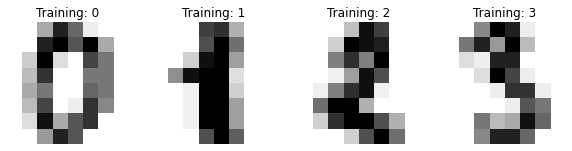

In [3]:
from sklearn.datasets import load_digits
df = load_digits()
_,axes = plt.subplots(nrows=1, ncols=4, figsize=(10,3))
for ax,image,label in zip(axes,df.images,df.target):
  ax.set_axis_off()
  ax.imshow(image, cmap=plt.cm.gray_r, interpolation="nearest")
  ax.set_title("Training: %i" % label)
  

**Data Preprocessing**

In [5]:
df.images.shape

(1797, 8, 8)

In [6]:
df.images[0]

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [7]:
df.images[0].shape

(8, 8)

In [8]:
n_samples = len(df.images)
data = df.images.reshape((n_samples,-1))

In [9]:
data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [10]:
data[0].shape

(64,)

In [11]:
data.shape

(1797, 64)

**Scaling Data**

In [12]:
data.min()

0.0

In [13]:
data.max()

16.0

In [14]:
data = data/16

In [15]:
data.min()

0.0

In [16]:
data.max()

1.0

**Train Test Split Data**

In [17]:
from sklearn.model_selection import train_test_split


In [24]:
X_train,X_test,y_train,y_test = train_test_split(data,df.target,test_size=0.3)


In [25]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1257, 64), (540, 64), (1257,), (540,))

**Random Forest Model**

In [26]:
from sklearn.ensemble import RandomForestClassifier

In [27]:
rf = RandomForestClassifier()

In [28]:
rf.fit(X_train,y_train)

RandomForestClassifier()

**Predict Test Data**

In [29]:
y_pred = rf.predict(X_test)

In [30]:
y_pred

array([3, 5, 9, 2, 4, 1, 9, 9, 6, 5, 7, 3, 0, 1, 9, 0, 2, 9, 1, 5, 5, 0,
       8, 6, 1, 1, 0, 9, 0, 0, 2, 1, 1, 7, 5, 5, 1, 7, 3, 4, 2, 9, 3, 9,
       6, 2, 9, 4, 4, 0, 3, 6, 3, 4, 4, 8, 2, 5, 3, 0, 1, 9, 0, 8, 6, 4,
       8, 2, 6, 9, 6, 4, 5, 6, 3, 0, 6, 1, 5, 4, 2, 5, 1, 2, 0, 3, 5, 1,
       2, 8, 9, 8, 8, 3, 8, 4, 1, 1, 2, 8, 0, 6, 1, 0, 1, 7, 7, 6, 1, 1,
       5, 5, 2, 1, 1, 4, 1, 2, 1, 8, 5, 8, 8, 9, 5, 6, 8, 8, 3, 3, 0, 9,
       7, 3, 4, 5, 2, 5, 4, 2, 6, 6, 1, 4, 3, 7, 8, 1, 5, 7, 1, 5, 3, 4,
       4, 6, 7, 3, 9, 2, 1, 4, 5, 2, 9, 8, 5, 8, 5, 6, 2, 1, 9, 5, 7, 6,
       9, 8, 8, 3, 4, 7, 0, 9, 7, 2, 3, 2, 6, 1, 9, 1, 6, 0, 5, 5, 6, 8,
       3, 0, 9, 7, 2, 1, 0, 1, 6, 8, 7, 0, 6, 4, 8, 4, 0, 3, 4, 7, 3, 8,
       2, 7, 0, 5, 8, 2, 1, 2, 2, 1, 7, 4, 4, 2, 4, 3, 1, 4, 3, 1, 8, 2,
       5, 9, 8, 6, 8, 7, 7, 7, 6, 2, 6, 7, 4, 1, 4, 0, 6, 9, 0, 9, 3, 7,
       6, 7, 3, 6, 0, 2, 2, 2, 9, 4, 9, 4, 0, 5, 8, 3, 0, 4, 8, 0, 4, 6,
       7, 0, 2, 6, 8, 6, 9, 5, 1, 8, 1, 7, 1, 9, 3,

**Model Accuracy**

In [31]:
from sklearn.metrics import confusion_matrix, classification_report


In [32]:
confusion_matrix(y_test,y_pred)

array([[51,  0,  0,  0,  2,  0,  0,  0,  0,  0],
       [ 0, 66,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 52,  0,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0, 52,  0,  1,  0,  0,  0,  0],
       [ 0,  0,  0,  0, 52,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 44,  1,  0,  0,  3],
       [ 0,  0,  0,  0,  0,  0, 55,  0,  1,  0],
       [ 0,  0,  0,  0,  1,  0,  0, 39,  0,  0],
       [ 0,  2,  1,  1,  0,  0,  0,  0, 58,  0],
       [ 0,  0,  0,  1,  0,  0,  0,  5,  0, 51]])

In [33]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.98      0.96      0.97        53
           1       0.97      1.00      0.99        66
           2       0.98      1.00      0.99        52
           3       0.96      0.96      0.96        54
           4       0.95      1.00      0.97        52
           5       0.98      0.92      0.95        48
           6       0.98      0.98      0.98        56
           7       0.89      0.97      0.93        40
           8       0.98      0.94      0.96        62
           9       0.94      0.89      0.92        57

    accuracy                           0.96       540
   macro avg       0.96      0.96      0.96       540
weighted avg       0.96      0.96      0.96       540

